## Ногорбеков Салим WIN-1-21

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

### Загрузка и исследование датасета

In [70]:
data = pd.read_csv('train.csv', low_memory=False)

In [71]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [72]:
data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [73]:
data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

### Визуализация

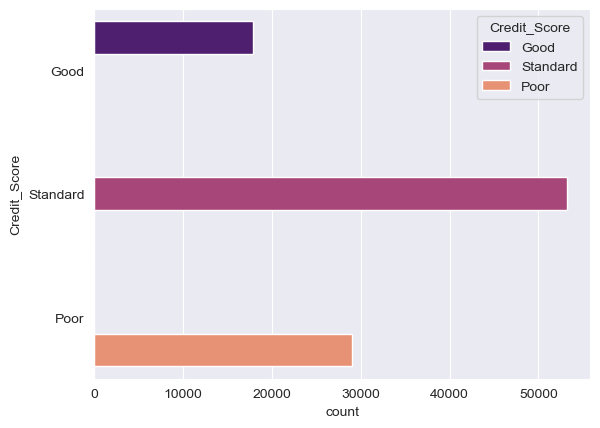

In [75]:
sns.countplot(y='Credit_Score', hue='Credit_Score', data=data, palette='magma');

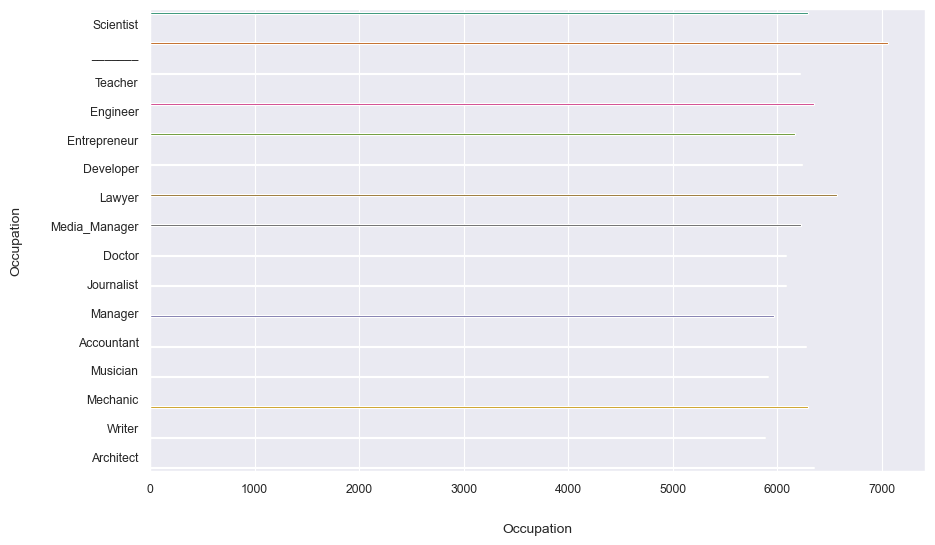

In [94]:
sns.set_context("paper")
plt.figure(figsize=(10, 6))

ax = sns.countplot(y='Occupation', hue='Occupation', data=data, palette='Dark2')

ax.legend([],[], frameon=False)
ax.set_xlabel('Occupation', fontsize=10, labelpad=20)  # Adjust fontsize and labelpad as needed
ax.set_ylabel('Occupation', fontsize=10, labelpad=20)  # Adjust fontsize and labelpad as needed

plt.show()

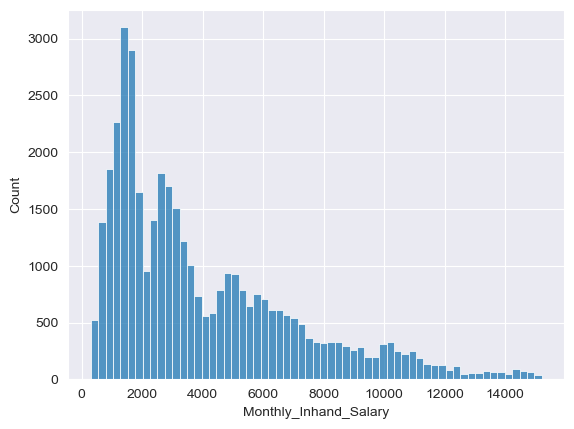

In [68]:
sns.histplot(data['Monthly_Inhand_Salary']);

### Определение наличия пропущенных значений

In [17]:
data.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [18]:
data.dropna(inplace=True)

### Проверка на наличие строковых значений в столбцах

In [19]:
columns = data.dtypes
string_columns = columns[columns == 'object']
print("Столбцы с строковыми значениями:")
print(string_columns)

Столбцы с строковыми значениями:
ID                         object
Customer_ID                object
Month                      object
Name                       object
Age                        object
SSN                        object
Occupation                 object
Annual_Income              object
Num_of_Loan                object
Type_of_Loan               object
Num_of_Delayed_Payment     object
Changed_Credit_Limit       object
Credit_Mix                 object
Outstanding_Debt           object
Credit_History_Age         object
Payment_of_Min_Amount      object
Amount_invested_monthly    object
Payment_Behaviour          object
Monthly_Balance            object
Credit_Score               object
dtype: object


### Обработка

In [20]:
data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

### Проверка на наличие "_"

In [23]:
data.apply(lambda x: x.astype(str).str.contains('_')).any()
data = data.applymap(lambda x: x.replace('_', ' ') if isinstance(x, str) else x)

### Возможно некоторые стоблцы должны иметь числовое значение, но они имеют строковые значения. Обработайте

In [24]:
data['ID'] = data['ID'].apply(lambda x: int(x, 16))

data['Customer_ID'] = data['Customer_ID'].str.replace('CUS ', '').apply(lambda x: int(x, 16))

numerical_columns = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
                     'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
                     'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

### Mapping

In [25]:
mapping = {
    'Scientist': 1,
    'Teacher': 2,
    'Engineer': 3,
    'Entrepreneur': 4,
    'Lawyer': 5,
    'Media_Manager': 6,
    'Doctor': 7,
    'Journalist': 8,
    'Manager': 9,
    'Mechanic': 10,
    'Writer': 11,
    'Accountant': 12,
    'Architect': 13,
    'Musician': 14,
    'Developer': 15
}

data['Occupation_nums'] = data['Occupation'].apply(lambda x: mapping.get(x, 0))

In [26]:
mapping = {
    'Good': 0,
    'Standard': 1,
    'Bad': 2
}

data['Mix_Credit'] = data['Credit_Mix'].apply(lambda x: mapping.get(x))

In [27]:
mapping = {
    'High spent Small value payments': 1,
    'Low spent Small value payments': 2,
    'High spent Large value payments': 3,
    'Low spent Large value payments': 4,
    'High spent Medium value payments': 5,
    'Low spent Medium value payments': 6
}

data['Behaviour_Payment'] = data['Payment_Behaviour'].apply(lambda x: mapping.get(x))

In [28]:
mapping = {
    'Poor': 1,
    'Standard': 2,
    'Good': 3,
}

data['Score_Credit'] = data['Credit_Score'].apply(lambda x: mapping.get(x))

In [29]:
columns_to_drop = ['Name', 'Month', 'SSN', 'Type_of_Loan', 'Occupation', 'Changed_Credit_Limit',
                   'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score', 'Type_of_Loan']

data.drop(columns=columns_to_drop, inplace=True)

In [30]:
data.dtypes

ID                            int64
Customer_ID                   int64
Age                           int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Num_Credit_Inquiries        float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Monthly_Balance             float64
Occupation_nums               int64
Mix_Credit                  float64
Behaviour_Payment           float64
Score_Credit                  int64
dtype: object

### Обучите модель алгоритмами классификации: Log Reg, Decision Tree, Random Forest

In [38]:
data = data.dropna()

X, y = data.drop(columns=['Score_Credit']), data['Score_Credit']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

C:\Users\JamesFox\anaconda3\envs\Lab - 4\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

### Предсказание на тестовом наборе (например, accuracy, precision, recall, F1-score)

In [43]:
logistic_regression_predict = logistic_regression.predict(X_test)
decision_tree_predict = decision_tree.predict(X_test)
random_forest_predict = random_forest.predict(X_test)

accuracy_lr = accuracy_score(y_test, logistic_regression_predict)
precision_lr = precision_score(y_test, logistic_regression_predict, average='weighted')
recall_lr = recall_score(y_test, logistic_regression_predict, average='weighted')
f1_lr = f1_score(y_test, logistic_regression_predict, average='weighted')

accuracy_dt = accuracy_score(y_test, decision_tree_predict)
precision_dt = precision_score(y_test, decision_tree_predict, average='weighted')
recall_dt = recall_score(y_test, decision_tree_predict, average='weighted')
f1_dt = f1_score(y_test, decision_tree_predict, average='weighted')

accuracy_rf = accuracy_score(y_test, random_forest_predict)
precision_rf = precision_score(y_test, random_forest_predict, average='weighted')
recall_rf = recall_score(y_test, random_forest_predict, average='weighted')
f1_rf = f1_score(y_test, random_forest_predict, average='weighted')

C:\Users\JamesFox\anaconda3\envs\Lab - 4\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
print("Логистическая регрессия:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)


Логистическая регрессия:
Accuracy: 0.31335372069317025
Precision: 0.09819055427225334
Recall: 0.31335372069317025
F1-score: 0.14952644169680307


In [45]:
print("\nДерево решений:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)


Дерево решений:
Accuracy: 0.6839959225280327
Precision: 0.6842638361336905
Recall: 0.6839959225280327
F1-score: 0.6841172038928197


In [46]:
print("\nСлучайный лес:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)


Случайный лес:
Accuracy: 0.772986748216106
Precision: 0.7735517315608673
Recall: 0.772986748216106
F1-score: 0.7730700000828089


### Визуализация

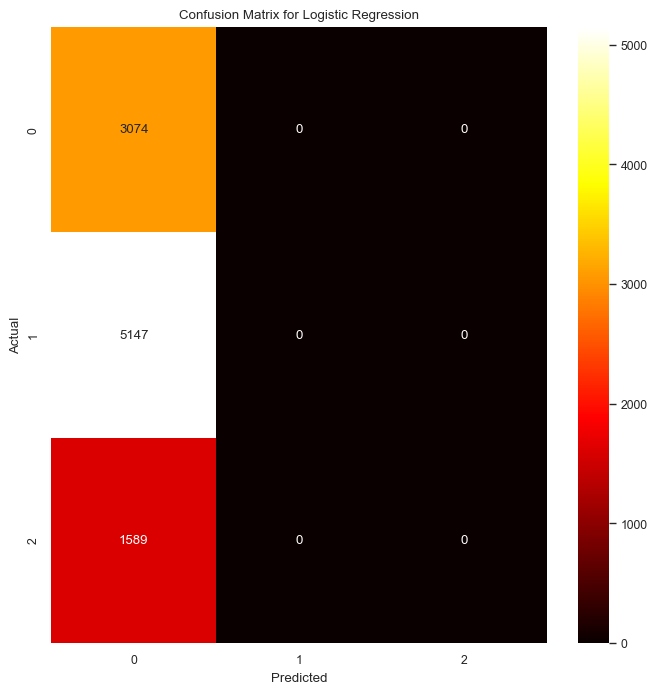

In [102]:
# Logistic regression
conf_matrix_lr = confusion_matrix(y_test, logistic_regression_predict)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix_lr, annot=True, fmt='g', cmap='hot')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

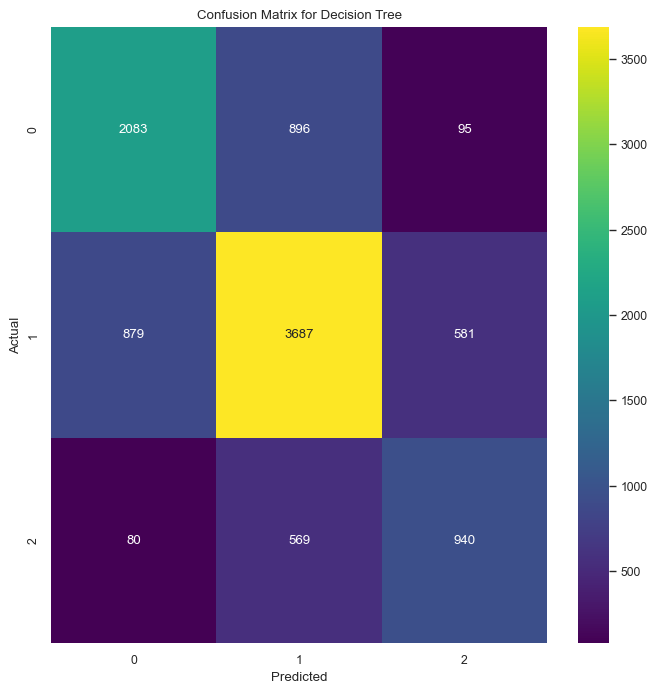

In [96]:
# Decision Tree
conf_matrix_dt = confusion_matrix(y_test, decision_tree_predict)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix_dt, annot=True, fmt='g', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

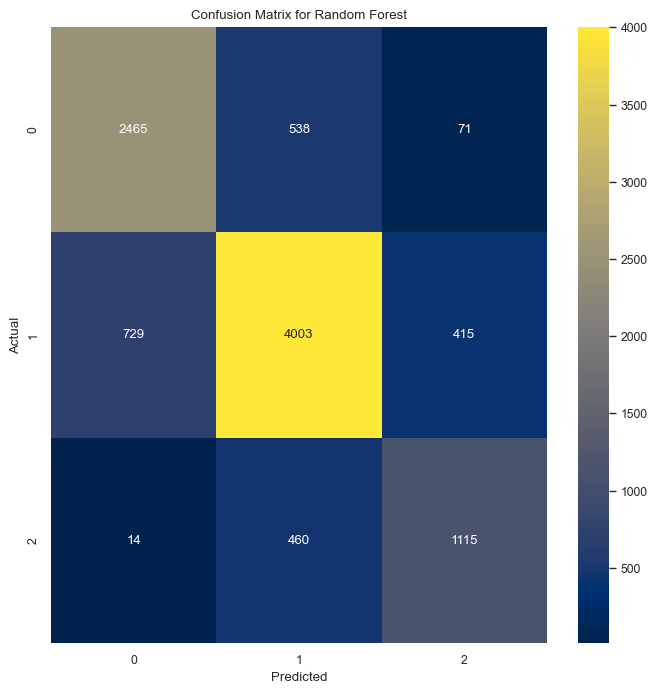

In [100]:
# Random Forest
conf_matrix_rf = confusion_matrix(y_test, random_forest_predict)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='g', cmap='cividis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

### Проанализируйте результаты и сделайте выводы о качестве модели

<p>Случайный лес показал самую высокую точность (около 77%), что может указывать на то, что он лучше справляется с общей классификацией, чем логистическая регрессия и дерево решений. Случайный лес также показал самый высокий F1-скор, что означает, что он может быть наилучшим в общем сбалансированным подходом к точности и полноте.

Из анализа этих результатов можно предположить, что случайный лес вероятно является наилучшей моделью среди рассмотренных. Это обусловлено тем, что он достигает хорошего баланса между точностью и полнотой, а также обладает наивысшей общей точностью.